In [1]:
from IPython.display import Image

In [2]:
import numpy as np

------------------------
#### Broadcasting 
----------------

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [3]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])

a + b

array([5, 6, 7])

`Broadcasting` allows these types of binary operations to be performed on `arrays of different sizes` – for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

Essentially, this is what happens (conceptually)

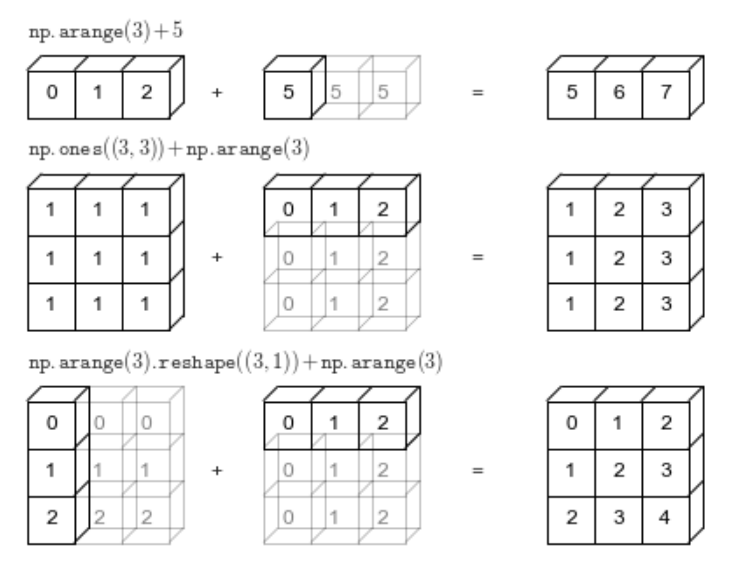

In [4]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\np-19.PNG', width=600)

In [5]:
a

array([0, 1, 2])

In [6]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value 5 into the array [5, 5, 5], and adds the results. The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.


We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [6]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [7]:
a

array([0, 1, 2])

In [8]:
M - a

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

Here the one-dimensional array a is stretched, or broadcast across the second dimension in order to match the shape of M.

#### broadcasting of both arrays

In [5]:
a = np.arange(3)
a

array([0, 1, 2])

In [7]:
a.shape

(3,)

In [6]:
b = np.arange(3)[:, np.newaxis]
b

array([[0],
       [1],
       [2]])

In [8]:
b.shape

(3, 1)

In [12]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [13]:
print(a.shape, b.shape)

(3,) (3, 1)


##### Rules of Broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

#### Example 1

In [13]:
M = np.ones((2, 3))
a = np.arange(3)

In [14]:
print(M)
print(a)

print(M.shape, a.shape)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]
(2, 3) (3,)


The shape of the arrays are

    M.shape = (2, 3)
    a.shape = (3,)

We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:

    M.shape -> (2, 3)
    a.shape -> (1, 3)

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

    M.shape -> (2, 3)
    a.shape -> (2, 3)
    
The shapes match, and we see that the final shape will be (2, 3):

In [15]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

#### Example 2

In [16]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [17]:
print(a)
print(b)

print(a.shape, b.shape)

[[0]
 [1]
 [2]]
[0 1 2]
(3, 1) (3,)


shape of the arrays:

    a.shape = (3, 1)
    b.shape = (3,)
    
Rule 1 says we must pad the shape of b with ones:

    a.shape -> (3, 1)
    b.shape -> (1, 3)
    
And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

    a.shape -> (3, 3)
    b.shape -> (3, 3)
    
Because the result matches, these shapes are compatible

In [18]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Example 3 - two arrays are not compatible:

In [9]:
M = np.ones((3, 2))
a = np.arange(4)

In [10]:
print(M)
print(a)

print(M.shape, a.shape)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2 3]
(3, 2) (4,)


The shape of the arrays are

    M.shape = (3, 2)
    a.shape = (3,)
    
rule 1 tells us that we must pad the shape of a with ones:

    M.shape -> (3, 2)
    a.shape -> (1, 3)
    
By rule 2, the first dimension of a is stretched to match that of M:

    M.shape -> (3, 2)
    a.shape -> (3, 3)

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible

In [21]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

OK... variation of the same

In [22]:
print(M)
print(a)

print(M.shape, a.shape)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]
(3, 2) (3,)


In [57]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])